# Task 20

### Feature Engineering

#### Feature Selection

In [23]:
import seaborn as sns
import matplotlib as mp
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [24]:
df = sns.load_dataset('titanic')

In [25]:
df = df.dropna(subset=['survived'])

In [26]:
df = df.fillna(df.median(numeric_only=True))

In [27]:
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', 'alone'], drop_first=True)


<Axes: >

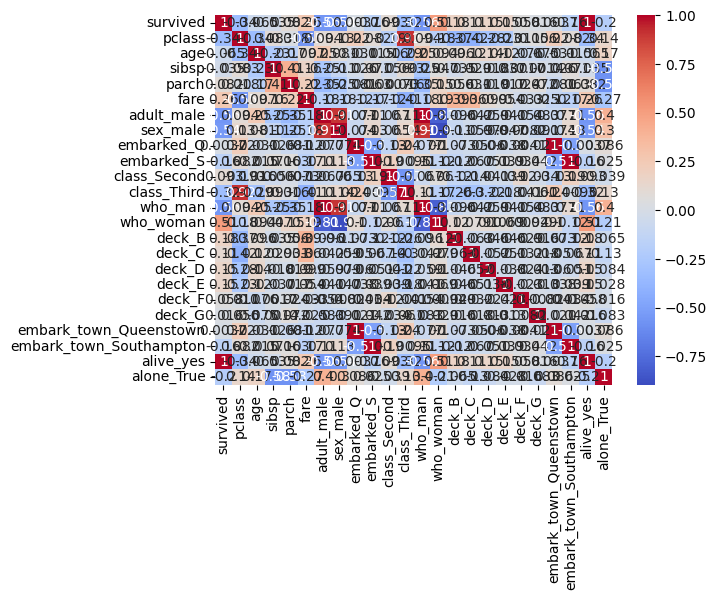

In [28]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')


In [29]:
X = df.drop(columns=['survived'])
y = df['survived']
selector = SelectKBest(mutual_info_classif, k='all')
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)

Selected Features: Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'sex_male',
       'embarked_Q', 'embarked_S', 'class_Second', 'class_Third', 'who_man',
       'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alive_yes',
       'alone_True'],
      dtype='object')


#### Feature Transformation

In [30]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Log transformation
df['fare_log'] = np.log(df['fare'] + 1)

# Normalization
scaler = MinMaxScaler()
df['fare_normalized'] = scaler.fit_transform(df[['fare']])

# Standardization
scaler = StandardScaler()
df['fare_standardized'] = scaler.fit_transform(df[['fare']])

df[['fare', 'fare_log', 'fare_normalized', 'fare_standardized']].head()


,fare,fare_log,fare_normalized,fare_standardized
0,7.2500,2.110213,0.014151,-0.502445
1,71.2833,4.280593,0.139136,0.786845
2,7.9250,2.188856,0.015469,-0.488854
3,53.1000,3.990834,0.103644,0.420730
4,8.0500,2.202765,0.015713,-0.486337


#### Feature Creation 

In [35]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')

print(df.head())

print(df.columns)


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [36]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')

df = df.dropna(subset=['survived'])

df = df.fillna(df.median(numeric_only=True))

df['age_fare_interaction'] = df['age'] * df['fare']

df['family_size'] = df['sibsp'] + df['parch'] + 1  

df[['age', 'fare', 'age_fare_interaction', 'family_size']].head()


,age,fare,age_fare_interaction,family_size
0,22.0,7.2500,159.5000,2
1,38.0,71.2833,2708.7654,2
2,26.0,7.9250,206.0500,1
3,35.0,53.1000,1858.5000,2
4,35.0,8.0500,281.7500,1


#### Polynomial Feature 

In [39]:
from sklearn.preprocessing import PolynomialFeatures

df = sns.load_dataset('titanic')

df = df.dropna(subset=['survived'])

df = df.fillna(df.median(numeric_only=True))

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['age', 'fare']])

poly_feature_names = poly.get_feature_names_out(['age', 'fare'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

print(poly_df.head())


    age     fare   age^2   age fare       fare^2
0  22.0   7.2500   484.0   159.5000    52.562500
1  38.0  71.2833  1444.0  2708.7654  5081.308859
2  26.0   7.9250   676.0   206.0500    62.805625
3  35.0  53.1000  1225.0  1858.5000  2819.610000
4  35.0   8.0500  1225.0   281.7500    64.802500


Handling Categorical Feature

In [40]:
print(df.columns)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [42]:
categorical_columns = ['sex', 'embarked', 'class', 'deck', 'embark_town', 'alive', 'alone']

df_onehot = pd.get_dummies(df, columns=[col for col in categorical_columns if col in df.columns], drop_first=True)

print("\nFirst few rows of the one-hot encoded dataset:")
print(df_onehot.head())


First few rows of the one-hot encoded dataset:
   survived  pclass   age  sibsp  parch     fare    who  adult_male  sex_male  \
0         0       3  22.0      1      0   7.2500    man        True      True   
1         1       1  38.0      1      0  71.2833  woman       False     False   
2         1       3  26.0      0      0   7.9250  woman       False     False   
3         1       1  35.0      1      0  53.1000  woman       False     False   
4         0       3  35.0      0      0   8.0500    man        True      True   

   embarked_Q  ...  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  \
0       False  ...   False   False   False   False   False   False   
1       False  ...   False    True   False   False   False   False   
2       False  ...   False   False   False   False   False   False   
3       False  ...   False    True   False   False   False   False   
4       False  ...   False   False   False   False   False   False   

   embark_town_Queenstown  embark_town_South